### Lab 3 : Asking Statistical Questions

This week we are going to concentrate on asking a statistical question. This process almost always consists of 3+ steps:

1) Writing down in words very precisely what question you are trying to ask. <br>
2) Translating the precise english question into a mathematical expression. This often includes determining the pdf of the background (possibly including trials), and the to integral to do to obtain a probability. <br>
3) Coverting the probability into equivalent sigma. <br>

So in this lab we will assume that we know the form of the signal-free background distribution (determining a distribution from data will be next week's lab). In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses.

<br> <br> <b>Problem 1 </b> <br>
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (6,4)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

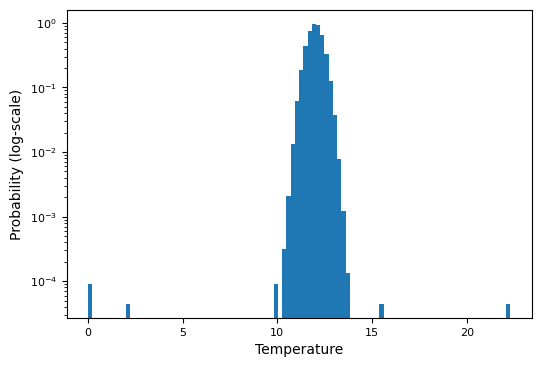

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 8)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
plt.show()

<u> Question </u> <br> <b> A) </b> <br>
So our goal is to identify bad data and throw it out.<br>
Start by exploring the data you have created with appropriate plots.
State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Restate your question in math. Be very clear.
Apply your statistical test and construct a truth table.

<u> Answer </u> <br> <b> A) </b> <br>
<b> Statistical Question: </b>
How can we create a test to remove erroneous readings and actual bad temperatures registered by the apparatus? Bad readings are defined as lying outside the 5 sigma bounds. I chose this question because after looking at the data. 5 sigma seemed a good threshold as it would let us retain a large chunk of good data and let us eliminate outliers which were a large distance away from the 5 sigma bounds.  <br> <br> 
<b> Mathematical Question: </b> <br>
How many points lie outside the 5 sigma bounds of the Gaussian with mean at 12K and scale 0.4? <br> <br>
> Preliminary Calculations: <br>
5 sigma corresponds to 0.4*5 = 2 kelvin deviations from the mean. Thus, the bounds of our Gaussian are 10 and 14.
Our test keeps all data within the closed bounds at 5 sigma, i.e 10 <=x<= 14. 

Exploratory Graph :

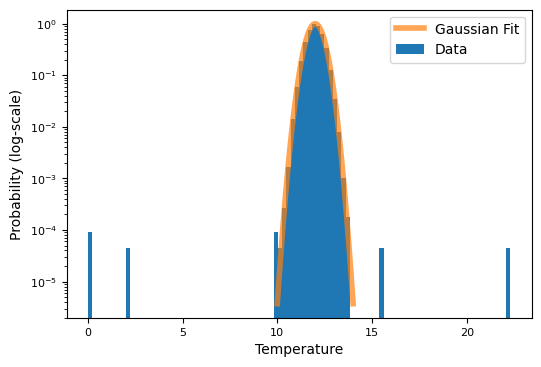

In [15]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True,label="Data")
plt.tick_params(labelsize = 8)
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 4,alpha = 0.7,label="Gaussian Fit")
ax.set_yscale("log")
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
ax.legend()
plt.show()


<b> Applying Statistical Test </b>

In [26]:
data=d
l_bound,u_bound=10,14
test=data[np.where((data >= l_bound) & (data <= u_bound))]

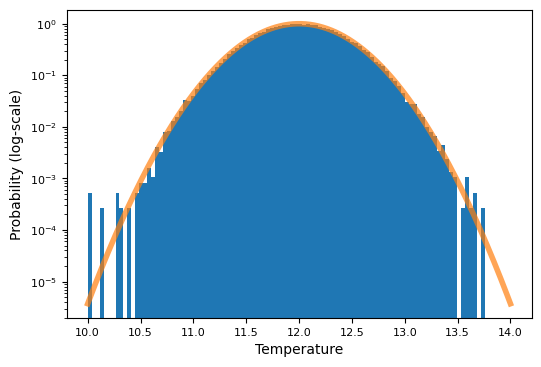

In [27]:
plot_test = test
fig, ax = plt.subplots(1, 1)
ax.hist(plot_test,100, density=True)
plt.tick_params(labelsize = 8)
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 4,alpha = 0.7)
ax.set_yscale("log")
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
plt.show()

Constructing truth table : <br>
Number of noise points= 8 <br>
Number of noise points thrown out = 5 <br>
Number of noise points retained = 3 <br>
Number of good points= 100000 <br>
Number of good points thrown out= 0 <br>

In [37]:
len_test,len_data=len(test),len(data)

good_gaussian=stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
good_gaussian_kept=np.where((good_gaussian > l_bound) & (good_gaussian < u_bound))
len(list(good_gaussian_kept[0]))

print (len_test,len_data)


100003 100008


|     |<b> True T </b> | <b> Bad T </b> | 
| --- | --- | --- |
| Your Test Good | 100000 | 3 |
| Your Test Bad | 0 | 5 |

<u> Question </u> <br>
B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

<u> Answer </u> <br>
The number of omissions <b> increases </b> as we decrease the threshold. Yes, it is a predictable quantity since the ideal distribution still follows a Gaussian and we can calculate the probability assiciated with different sigma (by finding cdf) [assuming "good data" does NOT include wrong temperature readings that lie within bounds]. 

<u> Question </u> <br>
C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

<u> Answer </u> <br>

Yes, bad data gets in. This can be managed by reducing sigma but not completely avoided by this method. If there is noise at 12 kelvin, that cannot be removed by the sigma method. Additionally, reducing sigma also removes good data. 

### Problem 2
In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

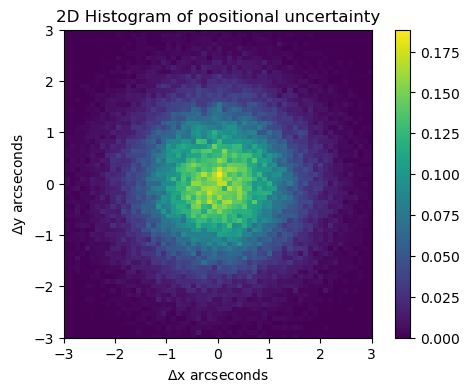

In [39]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty")
plt.ylabel("$\Delta$y arcseconds")
plt.xlabel("$\Delta$x arcseconds")
plt.colorbar(h[3], ax=ax)
plt.show()

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds? <br>

1) What is the question in words? <br>
2) What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.] <br>
3) What distance in arcseconds represents a 5 sigma detection of motion? <br>

1) <b> Statistical Question </b> : What distance in arcsecond does 5 sigma movement correspond to?
2) <b> Mathematical Question </b>: Find the 5 sigma point squivalent on Rayleigh distribution. 

> From HW, we know that the sum of amplitudes of a 2D Gaussian (0,sigma^2) is a Rayleigh(sigma) distribution.
   Sigma_squared= 1 => sigma=1. <br>Thus, we have a Rayleigh(1) distribution. <b> Mathematical Question </b> : Find 5 sigma squivalent on Rayleigh distribution.    

3) <b> Finding Distance </b>

In [52]:
prob5sigma=stats.norm.cdf(5)
prob_to_point=stats.rayleigh.ppf(prob5sigma) 
prob_to_point

5.489079776034238

Distance in arcseconds= 5.49

### Problem 3

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

As always:

1) What is the question in words? <br>
2) Translate the question to math, describing both the expected background pdf() and the integral you need to do. <br>
3) Convert to sigma. <br>

There are some unique aspects to this problem. Make sure you explore them in your explanation.

### Answer
The question desribes a random distribution with only one shape parameter and the events occur at intervals of time. Thus, we have a <u> Poisson </u> distribution with shape parameter 1. <br> <br> <br>
1) <b> Statistical Question </b> : Aat what sigma do we observe 6800 cosmic rays?
2) <b> Mathematical Question </b> : What sigma does the reading 6800 of cosmic rays correspond to when the distribution is averaged over 8 hours per day and data is collected over 15 days? As discussed above, the data follows a Poisson distribution.  <br>
3) <b> Conversion to Sigma:</b> <br>
Average rate: 1 per minute <br>
We observe for 8 hours per day, thus, n= 8*60=480 <br>
We know from the description of Poisson distribution that the convolution of independent Poisson distributions is also a Poisson distributiom. The new shape parameter is just the sum of shape parameters of the parent distributions. 
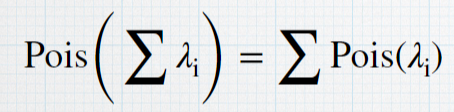

Text(0.5, 1.0, 'Original')

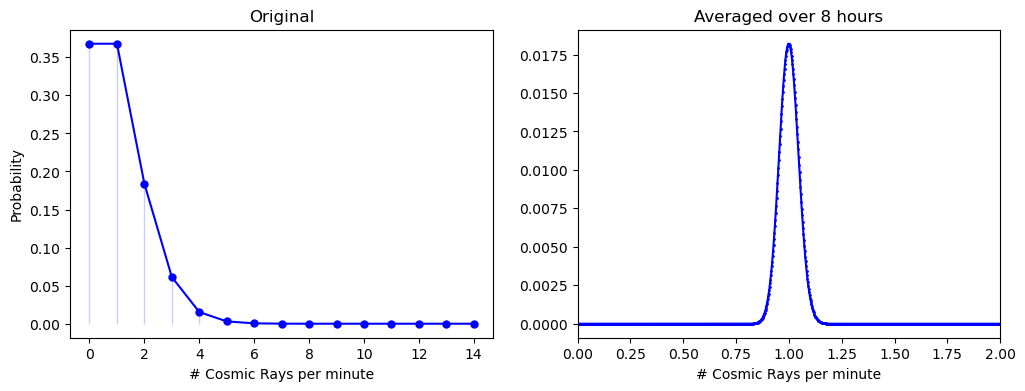

In [6]:
from scipy.stats import poisson
mu=1
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(0,15)
fig,(ax,ax1)=plt.subplots(1,2,figsize=(12,4))
line=ax.plot(x, poisson.pmf(x, mu), "bo-",ms=5, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=1, alpha=0.2)
n=480
new_mu=(n*mu)
x1=np.arange(0,15*n)
points=poisson.pmf(x1, new_mu)
x=np.linspace(0,15,len(points))
ax1.plot(x, poisson.pmf(x1, new_mu), "bo-",ms=1, label=' summed poisson pmf')
ax1.set_xlim(0,2)
ax.set_xlabel("# Cosmic Rays per minute")
ax.set_ylabel("Probability")
ax1.set_xlabel("# Cosmic Rays per minute")
ax1.set_title("Averaged over 8 hours")
ax.set_title("Original")


Text(0, 0.5, 'Number Density')

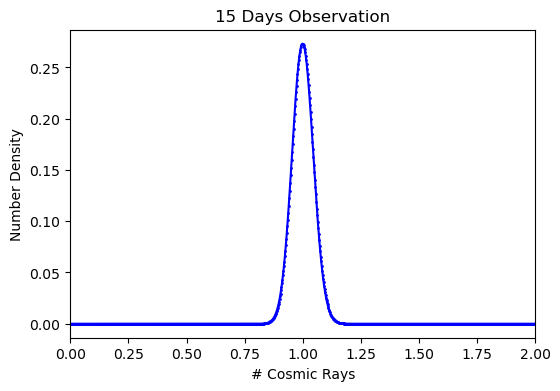

In [66]:
days=15
plt.plot(x, poisson.pmf(x1, new_mu)*days, "bo-",ms=1, label=' summed poisson pmf')
plt.xlim(0,2)
plt.title("15 Days Observation")
plt.xlabel("# Cosmic Rays")
plt.ylabel("Number Density")

In [27]:
point=6800
point_to_prob=stats.poisson.cdf(7200/6800,1)
prob_to_sigma=stats.norm.ppf(point_to_prob)
prob_to_sigma

0.6303245937410165

Sigma: 0.6